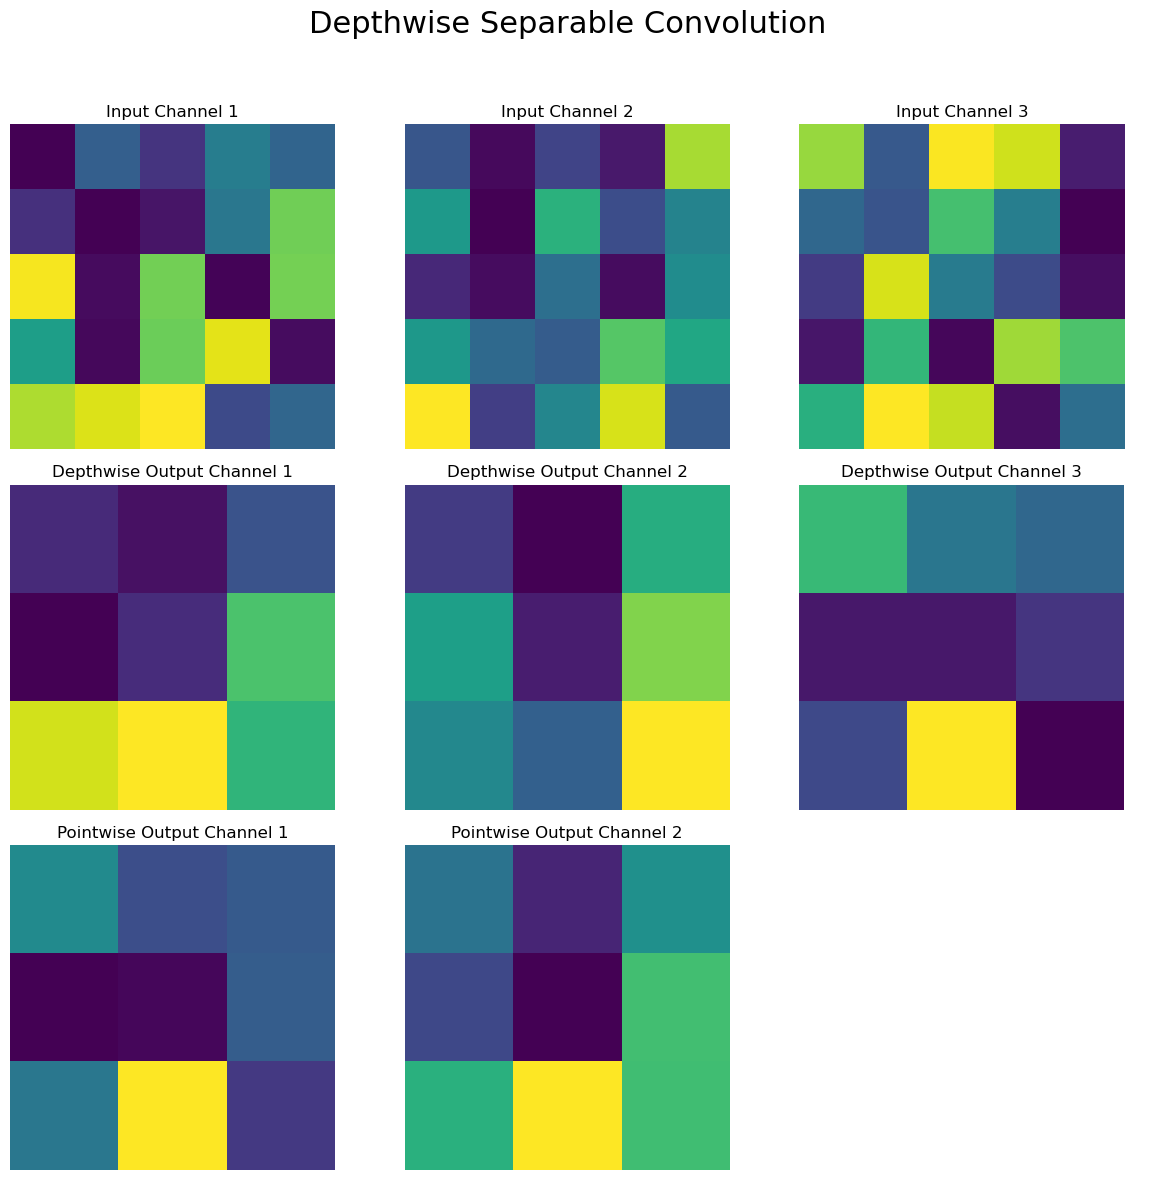

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Define 2D convolution
def conv2d(input, filter):
    filter_size = filter.shape[0]
    output_size = input.shape[0] - filter_size + 1
    output = np.zeros((output_size, output_size))
    for i in range(output_size):
        for j in range(output_size):
            output[i, j] = np.sum(input[i:i+filter_size, j:j+filter_size] * filter)
    return output

# Generate sample data for input tensor
input_tensor = np.random.rand(5, 5, 3)  # Height x Width x Depth

# Define depthwise filters
depthwise_filters = np.random.rand(3, 3, 3)  # Height x Width x Depth (3 filters for 3 channels)

# Perform depthwise convolution
def depthwise_conv(input_tensor, depthwise_filters):
    depthwise_output = np.zeros((input_tensor.shape[0] - depthwise_filters.shape[0] + 1,
                                 input_tensor.shape[1] - depthwise_filters.shape[1] + 1,
                                 input_tensor.shape[2]))
    for i in range(input_tensor.shape[2]):  # Iterate over channels
        depthwise_output[:, :, i] = conv2d(input_tensor[:, :, i], depthwise_filters[:, :, i])
    return depthwise_output

depthwise_output = depthwise_conv(input_tensor, depthwise_filters)

# Define pointwise filters
pointwise_filters = np.random.rand(1, 1, 3, 2)  # Height x Width x Depth x Number of Filters (2 filters)

# Perform pointwise convolution
def pointwise_conv(depthwise_output, pointwise_filters):
    output_shape = (depthwise_output.shape[0], depthwise_output.shape[1], pointwise_filters.shape[3])
    pointwise_output = np.zeros(output_shape)
    for i in range(pointwise_filters.shape[3]):  # Iterate over pointwise filters
        pointwise_output[:, :, i] = np.sum(depthwise_output * pointwise_filters[:, :, :, i], axis=2)
    return pointwise_output

pointwise_output = pointwise_conv(depthwise_output, pointwise_filters)

# Plot input, depthwise output, and pointwise output
fig, axes = plt.subplots(3, 3, figsize=(12, 12))
fig.suptitle('Depthwise Separable Convolution', fontsize=22)

# Input tensor visualization
for i in range(3):
    axes[0, i].imshow(input_tensor[:, :, i], cmap='viridis')
    axes[0, i].set_title(f'Input Channel {i+1}')
    axes[0, i].axis('off')

# Depthwise output visualization
for i in range(3):
    axes[1, i].imshow(depthwise_output[:, :, i], cmap='viridis')
    axes[1, i].set_title(f'Depthwise Output Channel {i+1}')
    axes[1, i].axis('off')

# Pointwise output visualization
for i in range(2):
    axes[2, i].imshow(pointwise_output[:, :, i], cmap='viridis')
    axes[2, i].set_title(f'Pointwise Output Channel {i+1}')
    axes[2, i].axis('off')

axes[2, 2].axis('off')  # Remove empty subplot

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


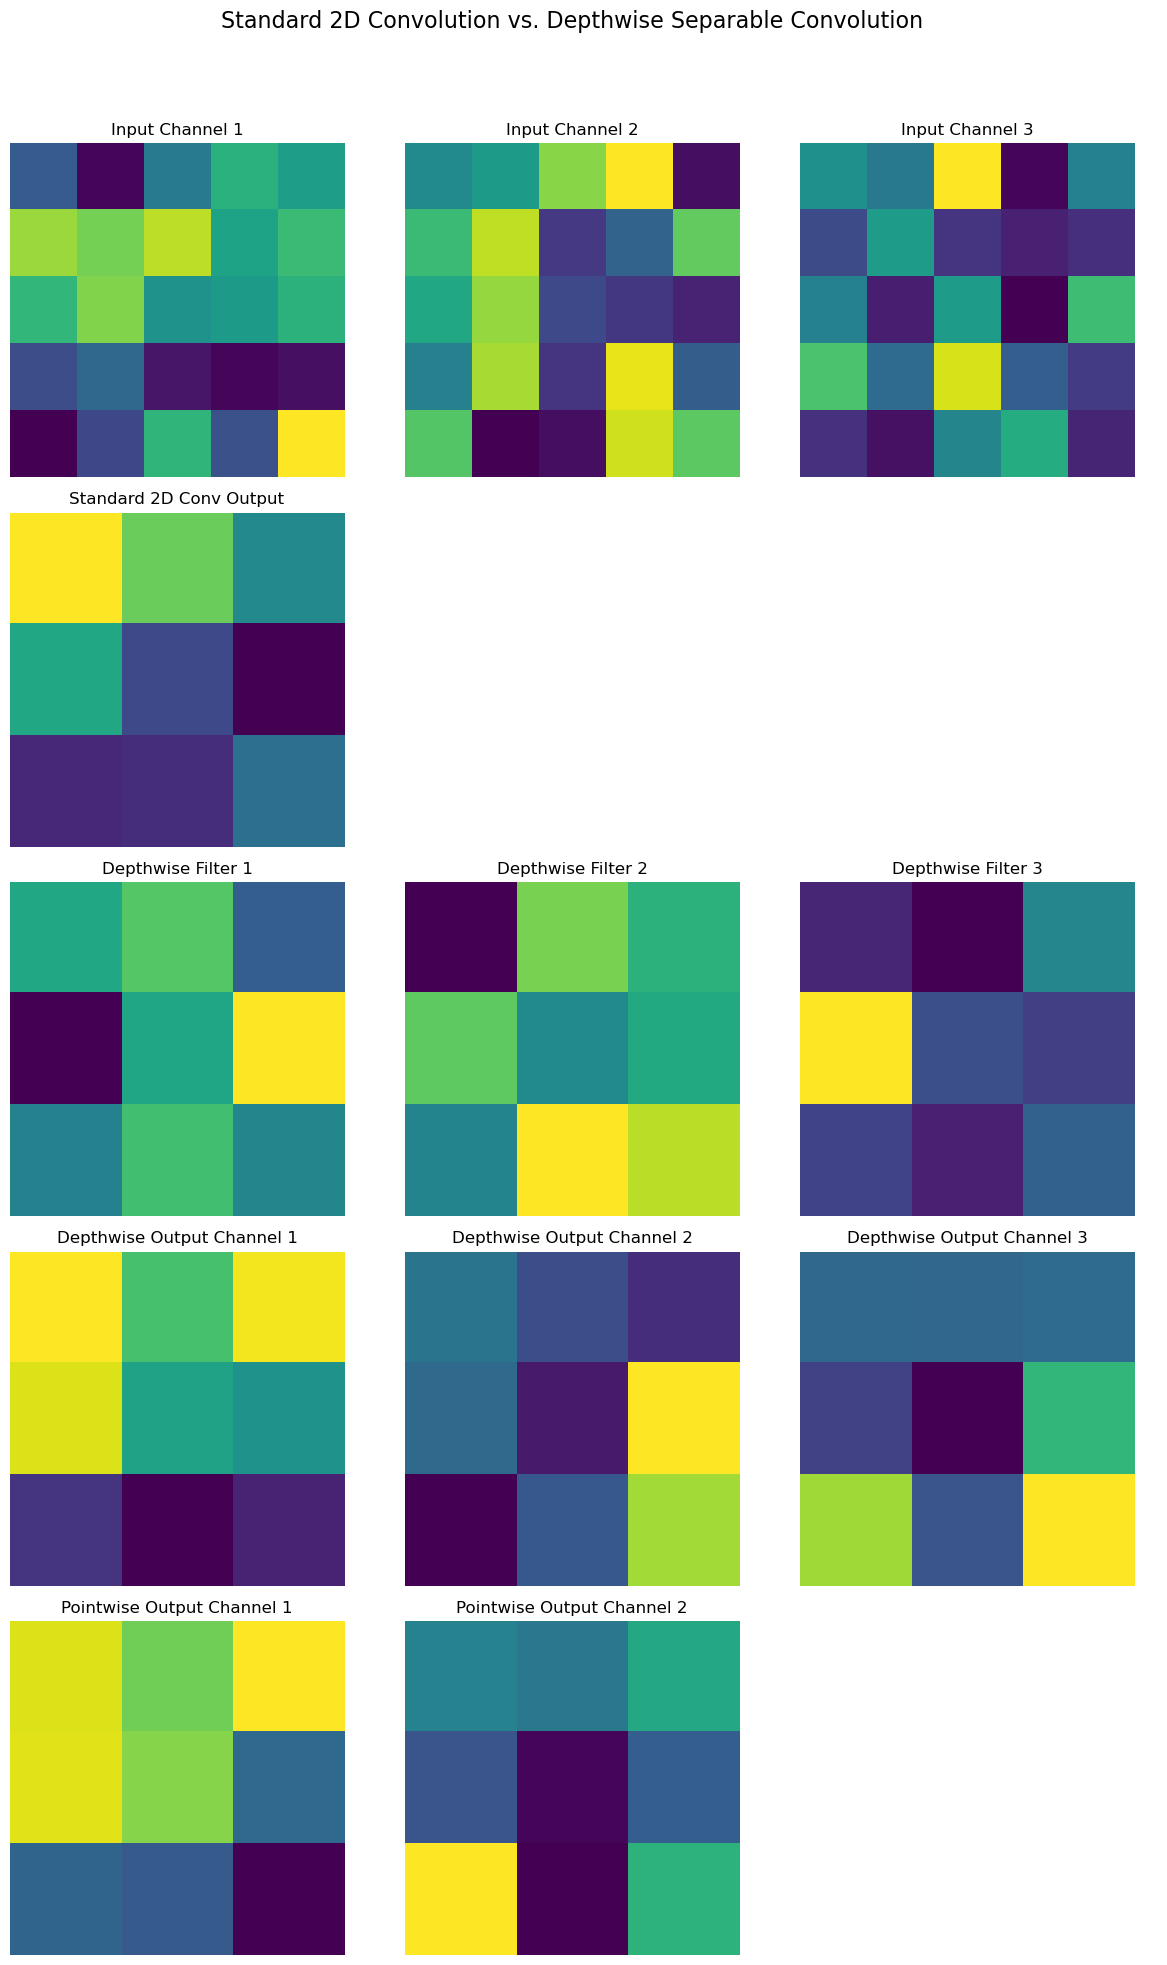

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define 2D convolution
def conv2d(input, filter):
    filter_size = filter.shape[0]
    output_size = input.shape[0] - filter_size + 1
    output = np.zeros((output_size, output_size))
    for i in range(output_size):
        for j in range(output_size):
            output[i, j] = np.sum(input[i:i+filter_size, j:j+filter_size] * filter)
    return output

# Generate sample data for input tensor
input_tensor = np.random.rand(5, 5, 3)  # Height x Width x Depth

# Define standard 2D filters
standard_filter = np.random.rand(3, 3, 3)  # Height x Width x Depth

# Perform standard 2D convolution
standard_output = np.zeros((input_tensor.shape[0] - standard_filter.shape[0] + 1,
                            input_tensor.shape[1] - standard_filter.shape[1] + 1))
for i in range(3):  # Iterate over input channels
    standard_output += conv2d(input_tensor[:, :, i], standard_filter[:, :, i])

# Define depthwise filters using He Normal initialization
def he_normal_init(shape):
    stddev = np.sqrt(2. / shape[-1])
    return np.random.normal(0, stddev, shape)

depthwise_filters = he_normal_init((3, 3, 3))  # Height x Width x Depth (3 filters for 3 channels)

# Perform depthwise convolution
def depthwise_conv(input_tensor, depthwise_filters):
    depthwise_output = np.zeros((input_tensor.shape[0] - depthwise_filters.shape[0] + 1,
                                 input_tensor.shape[1] - depthwise_filters.shape[1] + 1,
                                 input_tensor.shape[2]))
    for i in range(input_tensor.shape[2]):  # Iterate over channels
        depthwise_output[:, :, i] = conv2d(input_tensor[:, :, i], depthwise_filters[:, :, i])
    return depthwise_output

depthwise_output = depthwise_conv(input_tensor, depthwise_filters)

# Define pointwise filters using He Normal initialization
pointwise_filters = he_normal_init((1, 1, 3, 2))  # Height x Width x Depth x Number of Filters (2 filters)

# Perform pointwise convolution
def pointwise_conv(depthwise_output, pointwise_filters):
    output_shape = (depthwise_output.shape[0], depthwise_output.shape[1], pointwise_filters.shape[3])
    pointwise_output = np.zeros(output_shape)
    for i in range(pointwise_filters.shape[3]):  # Iterate over pointwise filters
        pointwise_output[:, :, i] = np.sum(depthwise_output * pointwise_filters[:, :, :, i], axis=2)
    return pointwise_output

pointwise_output = pointwise_conv(depthwise_output, pointwise_filters)

# Plot input, standard 2D convolution output, depthwise output, pointwise output, and filters
fig, axes = plt.subplots(5, 3, figsize=(12, 20))
fig.suptitle('Standard 2D Convolution vs. Depthwise Separable Convolution', fontsize=16)

# Input tensor visualization
for i in range(3):
    axes[0, i].imshow(input_tensor[:, :, i], cmap='viridis')
    axes[0, i].set_title(f'Input Channel {i+1}')
    axes[0, i].axis('off')

# Standard 2D convolution output visualization
axes[1, 0].imshow(standard_output, cmap='viridis')
axes[1, 0].set_title('Standard 2D Conv Output')
axes[1, 0].axis('off')
axes[1, 1].axis('off')
axes[1, 2].axis('off')

# Depthwise filters visualization
for i in range(3):
    axes[2, i].imshow(depthwise_filters[:, :, i], cmap='viridis')
    axes[2, i].set_title(f'Depthwise Filter {i+1}')
    axes[2, i].axis('off')

# Depthwise output visualization
for i in range(3):
    axes[3, i].imshow(depthwise_output[:, :, i], cmap='viridis')
    axes[3, i].set_title(f'Depthwise Output Channel {i+1}')
    axes[3, i].axis('off')

# Pointwise output visualization
for i in range(2):
    axes[4, i].imshow(pointwise_output[:, :, i], cmap='viridis')
    axes[4, i].set_title(f'Pointwise Output Channel {i+1}')
    axes[4, i].axis('off')

axes[4, 2].axis('off')  # Remove empty subplot

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
